# Description

The Daily Rainfall Data from the National Remote Sensing Centre (NRSC) for April 2019 provides satellite-based rainfall estimates across different regions of India. NRSC, a part of the Indian Space Research Organisation (ISRO), utilizes remote sensing technology to monitor precipitation levels, which are crucial for weather forecasting, hydrological studies, and disaster management.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("Daily_Rainfall_data_from_National_Remote_Sensing_Centre_Agency_during_April_2019.csv")
df

,State,District,Date,Year,Month,Avg_rainfall,Agency_name
0,Andaman & Nicobar,Nicobars,2019-04-09,2019,4,NaN,NRSC VIC MODEL
1,Andaman & Nicobar,Nicobars,2019-04-11,2019,4,NaN,NRSC VIC MODEL
2,Andaman & Nicobar,Nicobars,2019-04-13,2019,4,0.516817,NRSC VIC MODEL
3,Andaman & Nicobar,Nicobars,2019-04-01,2019,4,2.343552,NRSC VIC MODEL
4,Andaman & Nicobar,Nicobars,2019-04-02,2019,4,1.921437,NRSC VIC MODEL
...,...,...,...,...,...,...,...
21985,West Bengal,Purulia,2019-04-26,2019,4,NaN,NRSC VIC MODEL
21986,West Bengal,Purulia,2019-04-27,2019,4,0.001118,NRSC VIC MODEL
21987,West Bengal,Purulia,2019-04-28,2019,4,NaN,NRSC VIC MODEL
21988,West Bengal,Purulia,2019-04-29,2019,4,NaN,NRSC VIC MODEL


# Imports pandas and reads data into a DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21990 entries, 0 to 21989
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         21990 non-null  object 
 1   District      21990 non-null  object 
 2   Date          21990 non-null  object 
 3   Year          21990 non-null  int64  
 4   Month         21990 non-null  int64  
 5   Avg_rainfall  10135 non-null  float64
 6   Agency_name   21990 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [7]:
df.shape

(21990, 7)

# Dataset info

In [9]:
df.describe()

,Year,Month,Avg_rainfall
count,21990.0,21990.0,10135.000000
mean,2019.0,4.0,5.599624
std,0.0,0.0,13.381609
min,2019.0,4.0,0.000521
25%,2019.0,4.0,0.283763
50%,2019.0,4.0,1.487630
75%,2019.0,4.0,5.855379
max,2019.0,4.0,801.145108


#  Convert 'Date' column to datetime format


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df


,State,District,Date,Year,Month,Avg_rainfall,Agency_name
0,Andaman & Nicobar,Nicobars,2019-04-09,2019,4,NaN,NRSC VIC MODEL
1,Andaman & Nicobar,Nicobars,2019-04-11,2019,4,NaN,NRSC VIC MODEL
2,Andaman & Nicobar,Nicobars,2019-04-13,2019,4,0.516817,NRSC VIC MODEL
3,Andaman & Nicobar,Nicobars,2019-04-01,2019,4,2.343552,NRSC VIC MODEL
4,Andaman & Nicobar,Nicobars,2019-04-02,2019,4,1.921437,NRSC VIC MODEL
...,...,...,...,...,...,...,...
21985,West Bengal,Purulia,2019-04-26,2019,4,NaN,NRSC VIC MODEL
21986,West Bengal,Purulia,2019-04-27,2019,4,0.001118,NRSC VIC MODEL
21987,West Bengal,Purulia,2019-04-28,2019,4,NaN,NRSC VIC MODEL
21988,West Bengal,Purulia,2019-04-29,2019,4,NaN,NRSC VIC MODEL


In [12]:
df.isnull().sum()

State               0
District            0
Date                0
Year                0
Month               0
Avg_rainfall    11855
Agency_name         0
dtype: int64

# This code prints the total number of missing (null) values for each column in the dataset, helping identify incomplete data.

In [14]:
df['Avg_rainfall'] = df.groupby(['State', 'District'])['Avg_rainfall'].transform(lambda x: x.fillna(x.mean()))

In [15]:
df['Avg_rainfall'].fillna(df['Avg_rainfall'].mean())

0         4.304060
1         4.304060
2         0.516817
3         2.343552
4         1.921437
           ...    
21985     8.416154
21986     0.001118
21987     8.416154
21988     8.416154
21989    11.168127
Name: Avg_rainfall, Length: 21990, dtype: float64

# If there are still missing values, fill them with overall mean rainfall

In [17]:
df['Avg_rainfall'].fillna(df['Avg_rainfall'].mean(), inplace=True)
df


C:\Users\indhu\AppData\Local\Temp\ipykernel_4104\326769982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg_rainfall'].fillna(df['Avg_rainfall'].mean(), inplace=True)


,State,District,Date,Year,Month,Avg_rainfall,Agency_name
0,Andaman & Nicobar,Nicobars,2019-04-09,2019,4,4.304060,NRSC VIC MODEL
1,Andaman & Nicobar,Nicobars,2019-04-11,2019,4,4.304060,NRSC VIC MODEL
2,Andaman & Nicobar,Nicobars,2019-04-13,2019,4,0.516817,NRSC VIC MODEL
3,Andaman & Nicobar,Nicobars,2019-04-01,2019,4,2.343552,NRSC VIC MODEL
4,Andaman & Nicobar,Nicobars,2019-04-02,2019,4,1.921437,NRSC VIC MODEL
...,...,...,...,...,...,...,...
21985,West Bengal,Purulia,2019-04-26,2019,4,8.416154,NRSC VIC MODEL
21986,West Bengal,Purulia,2019-04-27,2019,4,0.001118,NRSC VIC MODEL
21987,West Bengal,Purulia,2019-04-28,2019,4,8.416154,NRSC VIC MODEL
21988,West Bengal,Purulia,2019-04-29,2019,4,8.416154,NRSC VIC MODEL


# Checking if there are still any null values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21990 entries, 0 to 21989
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   State         21990 non-null  object        
 1   District      21990 non-null  object        
 2   Date          21990 non-null  datetime64[ns]
 3   Year          21990 non-null  int64         
 4   Month         21990 non-null  int64         
 5   Avg_rainfall  21990 non-null  float64       
 6   Agency_name   21990 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 1.2+ MB


In [20]:
unique_states = df['State'].nunique()
unique_date = df['Date'].nunique()
unique_states, unique_date

(37, 30)

In [21]:
total_monthly_rainfall = df.groupby("Month")["Avg_rainfall"].sum()
print("\nTotal Monthly Rainfall:\n", total_monthly_rainfall)


Total Monthly Rainfall:
 Month
4    108264.177528
Name: Avg_rainfall, dtype: float64


# categorizes rainfall levels based on given numerical values and applies the categorization .

In [23]:
def categorize_rainfall(value):
    if value < 1:
        return "Low"
    elif 1 <= value < 5:
        return "Moderate"
    else:
        return "High"

df["Rainfall_Category"] = df["Avg_rainfall"].apply(categorize_rainfall)

df

,State,District,Date,Year,Month,Avg_rainfall,Agency_name,Rainfall_Category
0,Andaman & Nicobar,Nicobars,2019-04-09,2019,4,4.304060,NRSC VIC MODEL,Moderate
1,Andaman & Nicobar,Nicobars,2019-04-11,2019,4,4.304060,NRSC VIC MODEL,Moderate
2,Andaman & Nicobar,Nicobars,2019-04-13,2019,4,0.516817,NRSC VIC MODEL,Low
3,Andaman & Nicobar,Nicobars,2019-04-01,2019,4,2.343552,NRSC VIC MODEL,Moderate
4,Andaman & Nicobar,Nicobars,2019-04-02,2019,4,1.921437,NRSC VIC MODEL,Moderate
...,...,...,...,...,...,...,...,...
21985,West Bengal,Purulia,2019-04-26,2019,4,8.416154,NRSC VIC MODEL,High
21986,West Bengal,Purulia,2019-04-27,2019,4,0.001118,NRSC VIC MODEL,Low
21987,West Bengal,Purulia,2019-04-28,2019,4,8.416154,NRSC VIC MODEL,High
21988,West Bengal,Purulia,2019-04-29,2019,4,8.416154,NRSC VIC MODEL,High


In [24]:
df["Rainfall_Category"].value_counts()

Rainfall_Category
Moderate    9889
High        6126
Low         5975
Name: count, dtype: int64

#  Count of each category

In [26]:
top_districts = df.groupby("District")["Avg_rainfall"].mean().nlargest(10)
top_districts

District
Mahe             159.706786
Jiribam           29.095499
South Tripura     21.235217
Shopian           20.124046
Longleng          18.570779
Charaideo         18.479080
Gomati            18.127100
Sivasagar         17.281985
Sepahijala        17.020495
Longding          16.829291
Name: Avg_rainfall, dtype: float64

# Group by district to analyze top 10 districts with highest rainfall

In [28]:
state_rainfall = df.groupby("State")["Avg_rainfall"].mean().sort_values(ascending=False)
state_rainfall

State
Puducherry              42.346298
Tripura                 15.251261
Mizoram                 11.157873
Meghalaya               11.018514
Manipur                 10.444961
Delhi                   10.268257
Assam                   10.207366
Kerala                   8.747706
Chandigarh               8.302693
Nagaland                 8.257682
Arunachal Pradesh        7.300006
West Bengal              6.343162
Jharkhand                6.097652
Jammu & Kashmir          5.839465
Sikkim                   5.657352
Punjab                   5.635375
Andaman & Nicobar        5.225732
Haryana                  5.144266
Himachal Pradesh         4.937927
Odisha                   4.604435
Karnataka                4.132059
Tamil Nadu               4.088031
Uttarakhand              3.437427
Rajasthan                3.200016
Bihar                    3.054282
Uttar Pradesh            2.633344
Telangana                2.631820
Daman & Diu              2.612251
Madhya Pradesh           2.587800
Lakshadw

# District-wise average rainfall (Top 10 districts)

In [30]:
district_rainfall = df.groupby("District")["Avg_rainfall"].mean().sort_values(ascending=False)
district_rainfall

District
Mahe             159.706786
Jiribam           29.095499
South Tripura     21.235217
Shopian           20.124046
Longleng          18.570779
                    ...    
Chhotaudepur       0.050190
Jamnagar           0.040591
Kachchh            0.007856
Mahisagar          0.007177
Dohad              0.003963
Name: Avg_rainfall, Length: 729, dtype: float64

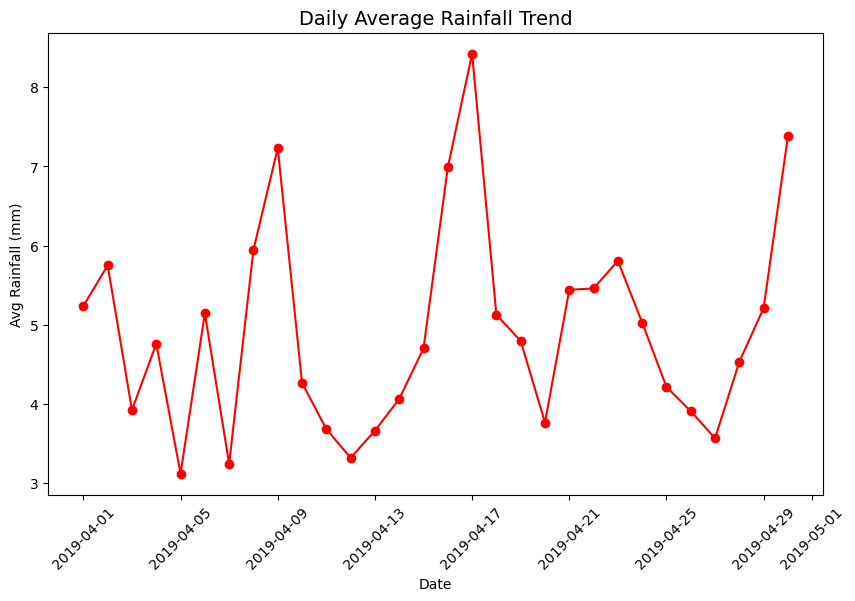

In [31]:
plt.figure(figsize=(10, 6))
daily_rainfall = df.groupby('Date')['Avg_rainfall'].mean()
plt.plot(daily_rainfall, marker='o', linestyle='-', color='red')
plt.title("Daily Average Rainfall Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Avg Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

# Distribution of Average Rainfall

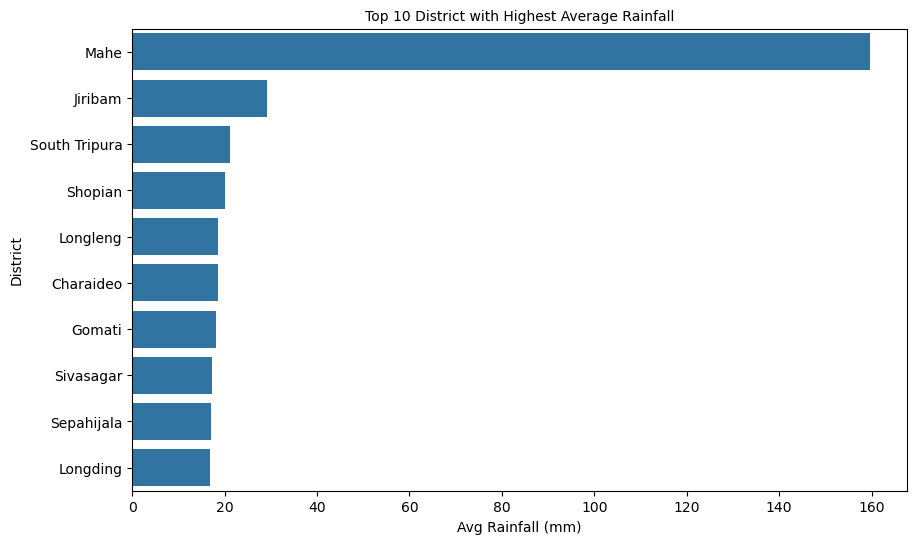

In [33]:
plt.figure(figsize=(10, 6))
top_districts = df.groupby('District')['Avg_rainfall'].mean().nlargest(10)
sns.barplot(x=top_districts.values, y=top_districts.index)
plt.title("Top 10 District with Highest Average Rainfall", fontsize=10)
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("District")
plt.show()

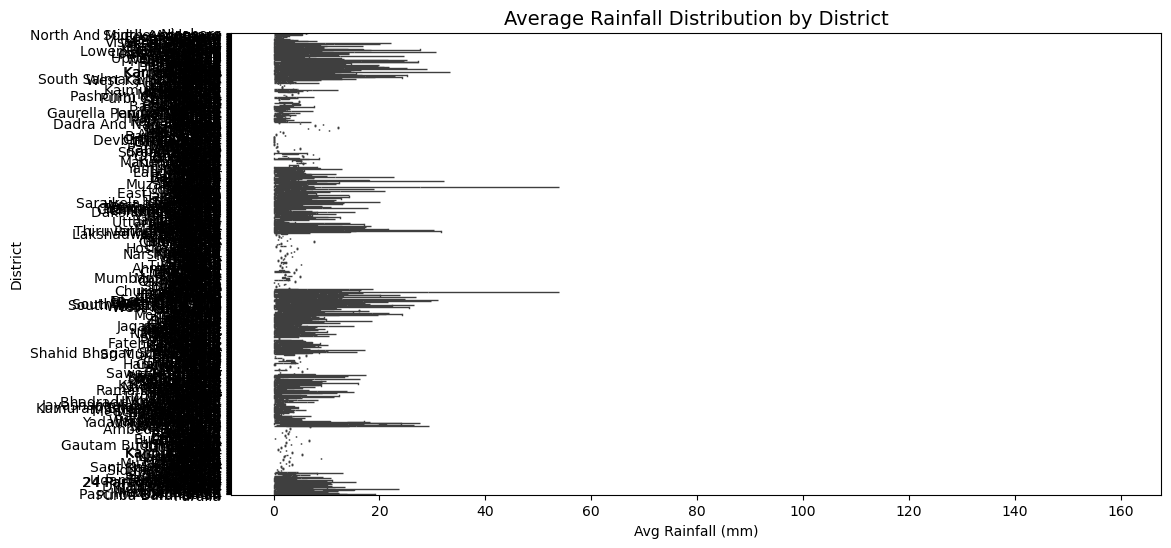

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Avg_rainfall', y='District', orient='h', showfliers=False)
plt.title("Average Rainfall Distribution by District", fontsize=14)
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("District")
plt.show()

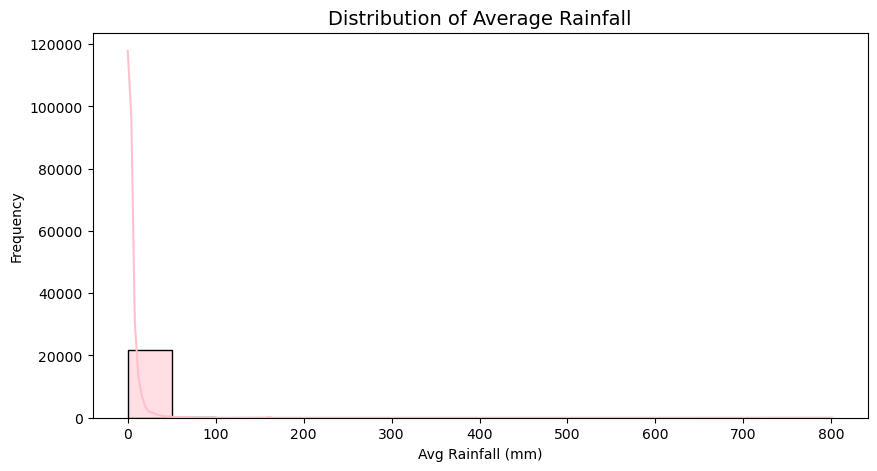

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Avg_rainfall'], bins=16, kde=True, color='pink')
plt.title("Distribution of Average Rainfall", fontsize=14)
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

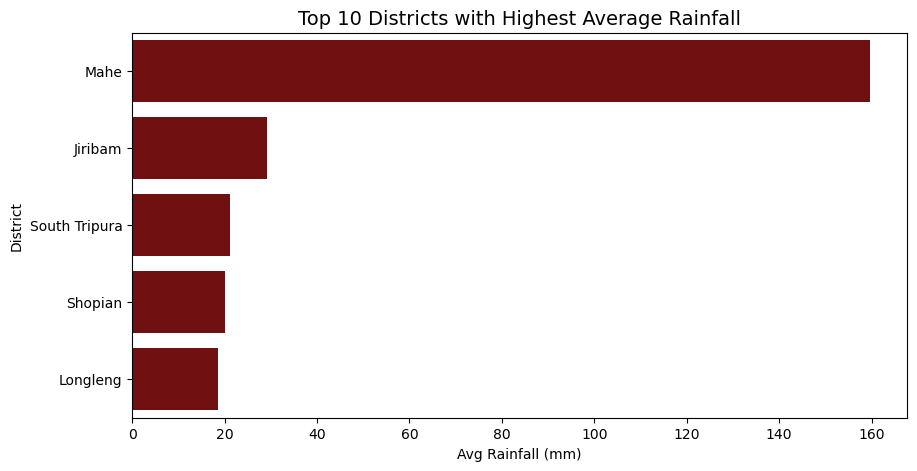

In [36]:
plt.figure(figsize=(10, 5))
top_districts = df.groupby('District')['Avg_rainfall'].mean().nlargest(5)
sns.barplot(x=top_districts.values, y=top_districts.index, color='maroon')
plt.title("Top 10 Districts with Highest Average Rainfall", fontsize=14)
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("District")
plt.show()

<Figure size 600x700 with 0 Axes>

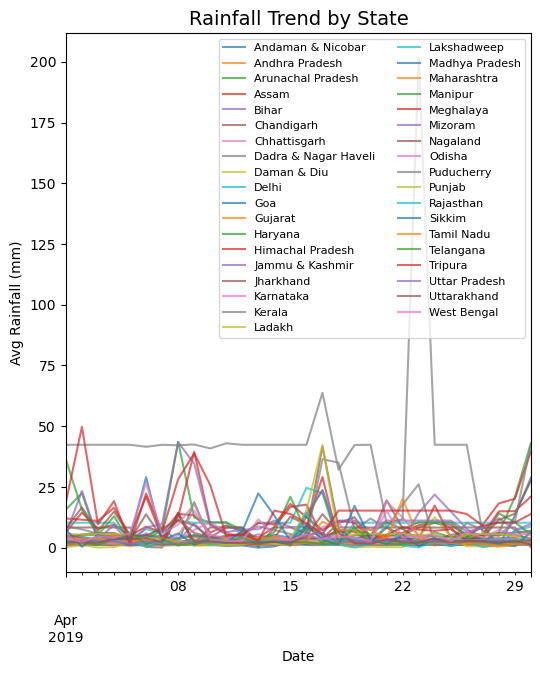

In [37]:
plt.figure(figsize=(6, 7))
state_rainfall_trend = df.groupby(['Date', 'State'])['Avg_rainfall'].mean().unstack()
state_rainfall_trend.plot(figsize=(6, 7), alpha=0.7)
plt.title("Rainfall Trend by State", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Avg Rainfall (mm)")
plt.legend(loc='upper right', fontsize=8, ncol=2)
plt.show()

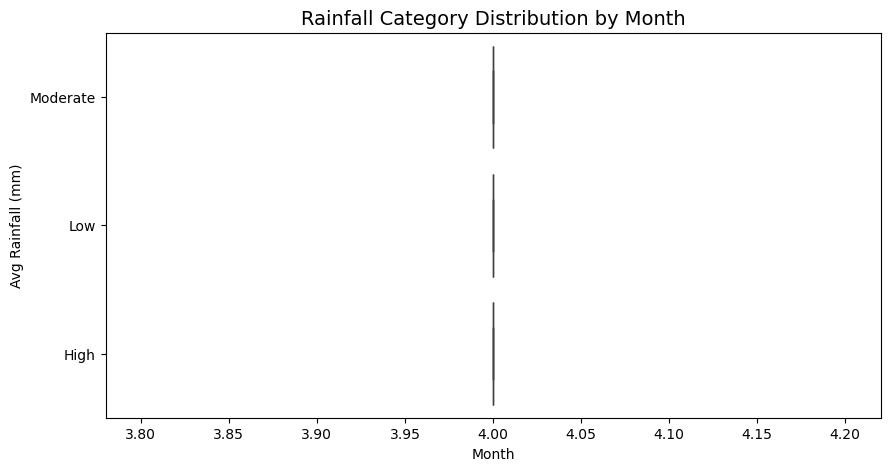

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Month'], y=df['Rainfall_Category'])
plt.title("Rainfall Category Distribution by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Avg Rainfall (mm)")
plt.show()

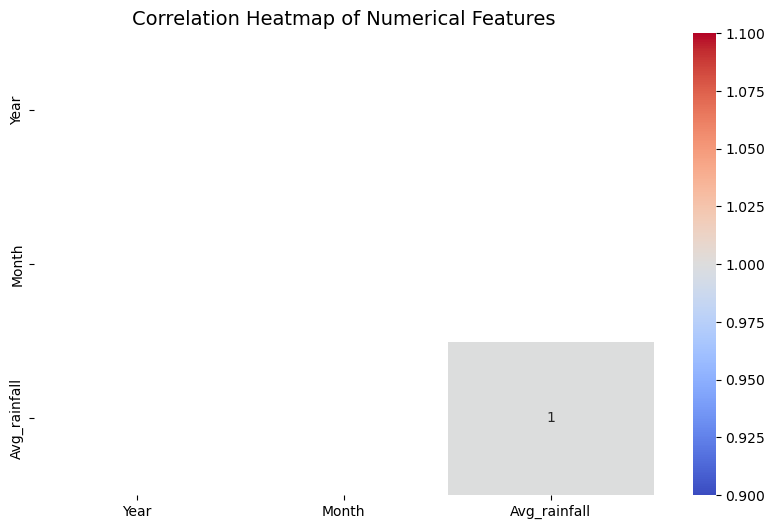

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

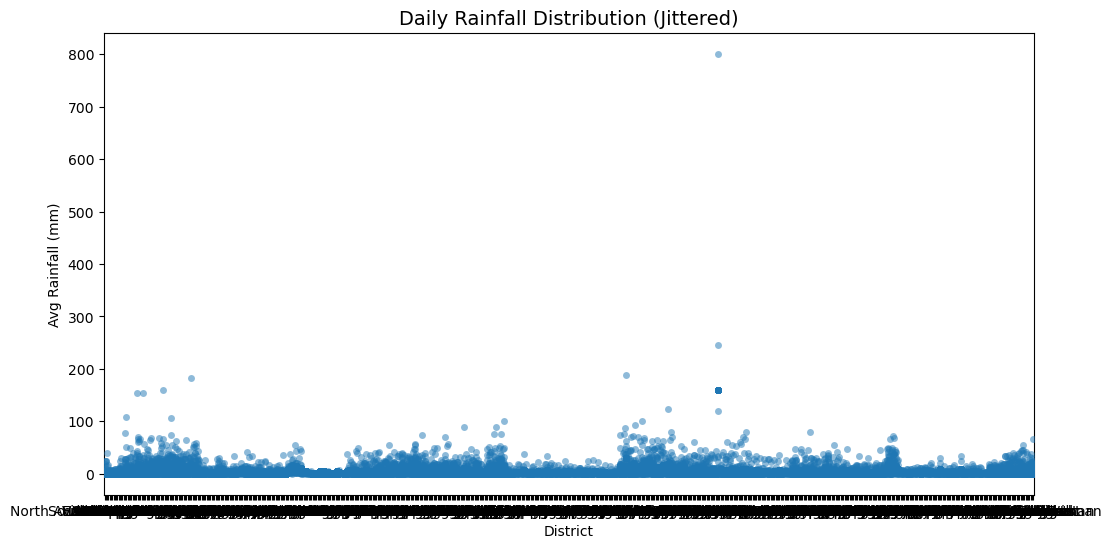

In [40]:
plt.figure(figsize=(12, 6))
sns.stripplot(x=df['District'], y=df['Avg_rainfall'], jitter=True, alpha=0.5)
plt.title("Daily Rainfall Distribution (Jittered)", fontsize=14)
plt.xlabel("District")
plt.ylabel("Avg Rainfall (mm)")
plt.show()

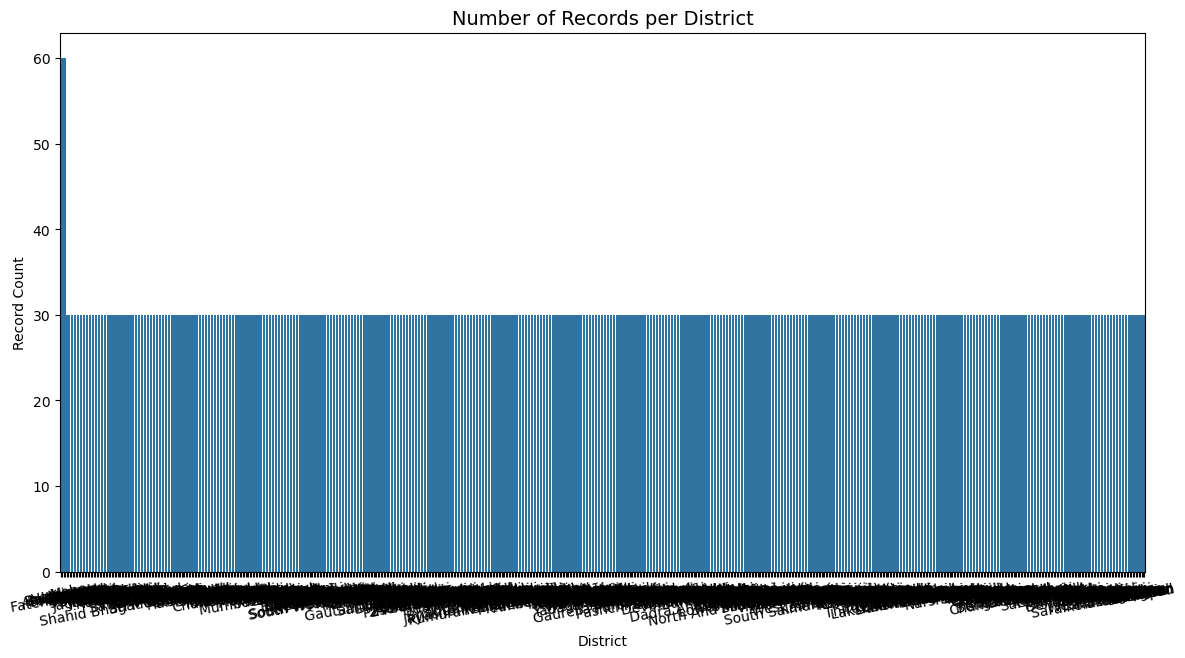

In [41]:
plt.figure(figsize=(14, 7))
state_counts = df['District'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xticks(rotation=10)
plt.title("Number of Records per District", fontsize=14)
plt.xlabel("District")
plt.ylabel("Record Count")
plt.show()

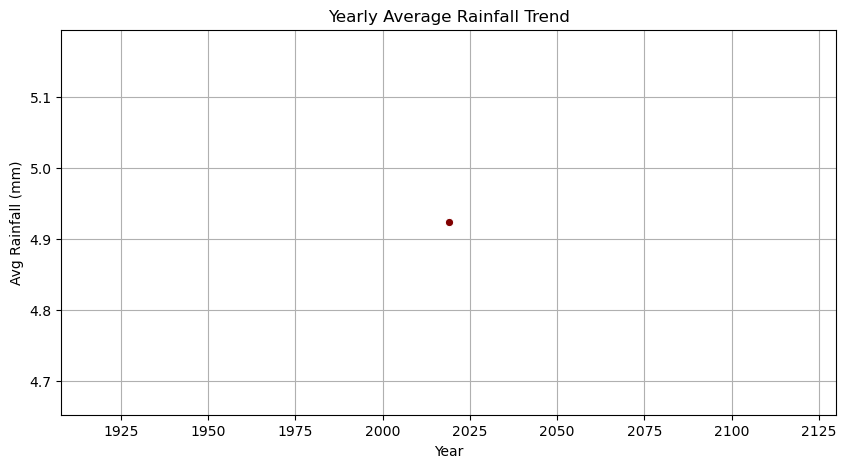

In [42]:
yearly_trend = df.groupby("Year")["Avg_rainfall"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", linestyle="-", color="maroon")
plt.title("Yearly Average Rainfall Trend")
plt.xlabel("Year")
plt.ylabel("Avg Rainfall (mm)")
plt.grid()
plt.show()

# Observations from the dataset


Total Observations: 21,990 rows

Columns:

State: Name of the state (categorical)

District: Name of the district (categorical)

Date: Date of observation (string format)

Year: Year of observation (integer, 2019)

Month: Month of observation (integer, 4 for April)

Avg_rainfall: Average rainfall (float, with missing values)

Agency_name: Data source (NRSC VIC MODEL)

Observations:
The dataset contains daily rainfall data for multiple districts across India in April 2019.

Avg_rainfall has missing values (only 10,135 out of 21,990 are available).

The dataset is sorted by State, District, and Date.